In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to show all the columns of the dataframe in the notebook
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/Users/mattmastin/Desktop/houseprice.csv')
data.shape

(1460, 81)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
data[vars_with_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [6]:
data_na = data[vars_with_na].isnull().mean()
data_na = pd.DataFrame(data_na.reset_index())
data_na.columns = ['variable', 'na_percentage']

data_na.sort_values(by='na_percentage', ascending=False, inplace=True)
data_na

,variable,na_percentage
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479
14,GarageQual,0.055479


In [7]:
vars_cca = [var for var in data.columns if data[var].isnull().mean() < 0.05]
vars_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [8]:
len(data[vars_cca].dropna()) / len(data)

0.9671232876712329

In [9]:
data_cca = data[vars_cca].dropna()
data.shape, data_cca.shape

((1460, 81), (1412, 70))

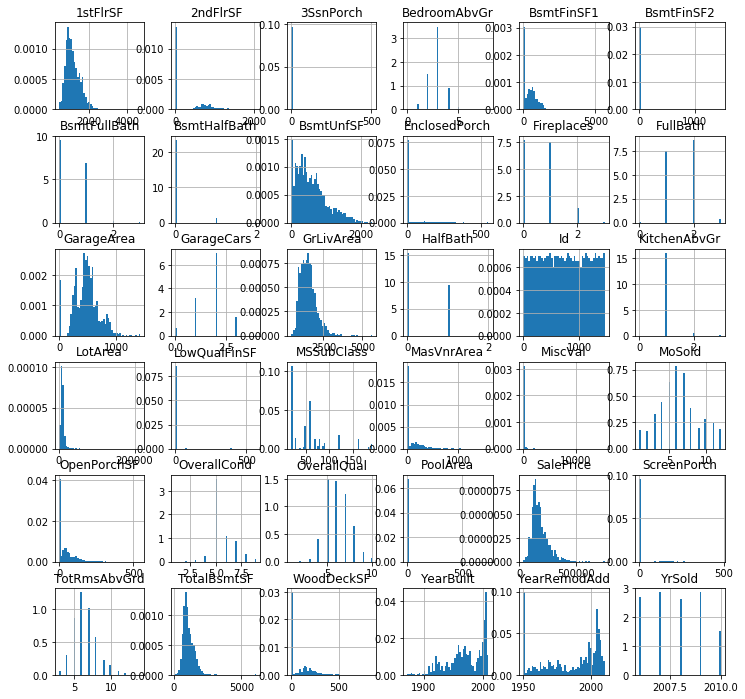

In [10]:
data_cca.hist(bins=50, density=True, figsize=(12,12))
plt.show()

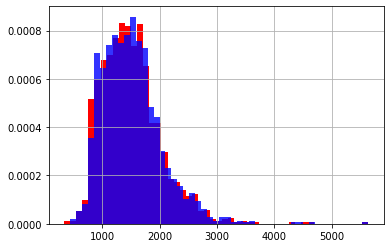

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

data['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red')

data_cca['GrLivArea'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
data = pd.read_csv('/Users/mattmastin/Desktop/feature-engineering/Section-03-Variable-Characteristics/titanic.csv',
                  usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [15]:
data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [17]:
X_train.isnull().mean()

age     0.191048
fare    0.000000
dtype: float64

In [18]:
def impute_na(df, variable, mean_median):
    return df[variable].fillna(mean_median)

In [19]:
median = X_train.age.median()

In [20]:
median

28.0

In [21]:
mean = X_train.age.mean()
mean

30.23144399460189

In [22]:
X_train['age_median'] = impute_na(X_train, 'age', median)
X_train['age_mean'] = impute_na(X_train, 'age', mean)
X_train['age_mean'] = np.round(X_train['age_mean'], 1)

X_train.head(15)

,age,fare,age_median,age_mean
501,13.0,19.5000,13.0,13.0
588,4.0,23.0000,4.0,4.0
402,30.0,13.8583,30.0,30.0
1193,NaN,7.7250,28.0,30.2
686,22.0,7.7250,22.0,22.0
971,NaN,7.8792,28.0,30.2
117,30.0,56.9292,30.0,30.0
540,2.0,26.0000,2.0,2.0
294,49.0,110.8833,49.0,49.0
261,35.0,26.2875,35.0,35.0


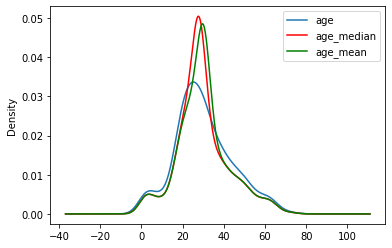

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['age'].plot(kind='kde', ax=ax)
X_train['age_median'].plot(kind='kde', ax=ax, color='red')
X_train['age_mean'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [24]:
X_train[['fare', 'age', 'age_median', 'age_mean']].cov()

,fare,age,age_median,age_mean
fare,2248.326729,136.176223,114.961682,110.198311
age,136.176223,194.163047,194.163047,194.159033
age_median,114.961682,194.163047,157.798430,157.035694
age_mean,110.198311,194.159033,157.035694,157.021707


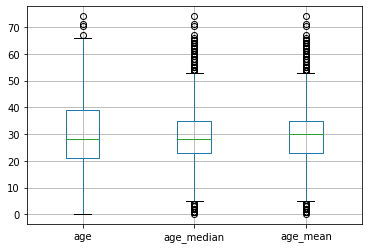

In [25]:
X_train[['age', 'age_median', 'age_mean']].boxplot()

In [26]:
cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [27]:
data = pd.read_csv('/Users/mattmastin/Desktop/houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [28]:
[var for var in data.columns if data[var].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [29]:
data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                   data['SalePrice'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

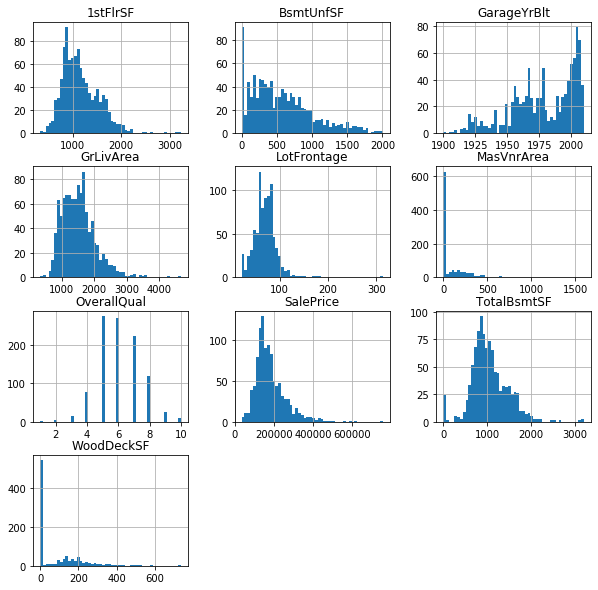

In [31]:
X_train.hist(bins=50, figsize=(10, 10))
plt.show()        

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [33]:
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

In [34]:
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                   data['SalePrice'],
                                                   test_size=0.3,
                                                   random_state=0)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [36]:
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

In [37]:
imputer = SimpleImputer(strategy='median')

imputer.fit(X_train[cols_to_use])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [39]:
imputer.statistics_

array([   6. ,  992. , 1095. , 1479. ,    0. ,  486.5,   69. ,    0. ,
       1979. ])

In [40]:
X_train[cols_to_use].median()

OverallQual       6.0
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
WoodDeckSF        0.0
BsmtUnfSF       486.5
LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [41]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,   69.,  573., 1998.],
       [   6., 1291., 1291., ...,   69.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0., 1979.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   69.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [42]:
pd.DataFrame(X_train, columns=cols_to_use).head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,69.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,69.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,1979.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


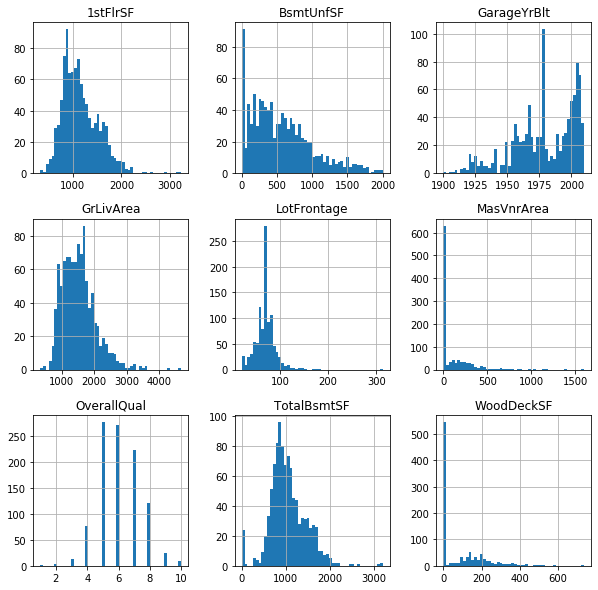

In [43]:
X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [45]:
numeric_features_mean = ['LotFrontage']
numeric_features_median = ['MasVnrArea', 'GarageYrBlt']

numeric_mean_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

numeric_median_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', numeric_mean_imputer, numeric_features_mean),
    ('median_imputer', numeric_median_imputer, numeric_features_median)
], remainder='passthrough')

In [46]:
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('mean_imputer',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0))],
                                          verbose=False),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(memory=None,
              

In [47]:
preprocessor.transformers

[('mean_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0))],
           verbose=False), ['MasVnrArea', 'GarageYrBlt'])]

In [49]:
preprocessor.named_transformers_['mean_imputer'].named_steps['imputer'].statistics_

array([69.54500978])

In [50]:
X_train[numeric_features_mean].mean()

LotFrontage    69.54501
dtype: float64

In [51]:
preprocessor.named_transformers_['median_imputer'].named_steps['imputer'].statistics_

array([   0., 1979.])

In [52]:
X_train[numeric_features_median].median()

MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [53]:
X_train = preprocessor.transform(X_train)
np.mean(np.isnan(X_train))

0.0

In [55]:
X_test = pd.DataFrame(X_test, columns=cols_to_use)
X_test = preprocessor.transform(X_test)
np.mean(np.isnan(X_test))

0.0

In [56]:
X_train

array([[  69.,  573., 1998., ..., 2034.,  576.,  318.],
       [  69.,    0., 1996., ..., 1291.,  307.,  288.],
       [  50.,    0., 1979., ...,  858.,  117.,  162.],
       ...,
       [  68.,    0., 1978., ..., 1902.,    0.,    0.],
       [  69.,   18., 2003., ..., 1557.,  143., 1374.],
       [  58.,   30., 1998., ..., 1839.,    0., 1195.]])

In [57]:
remainder_cols = [cols_to_use[c] for c in [0, 1, 2, 3, 4, 5]]
remainder_cols

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF']

In [58]:
pd.DataFrame(X_train,
            columns = numeric_features_mean + numeric_features_median + remainder_cols).head()

,LotFrontage,MasVnrArea,GarageYrBlt,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF
0,69.0,573.0,1998.0,7.0,1057.0,1057.0,2034.0,576.0,318.0
1,69.0,0.0,1996.0,6.0,1291.0,1291.0,1291.0,307.0,288.0
2,50.0,0.0,1979.0,5.0,858.0,858.0,858.0,117.0,162.0
3,60.0,0.0,1939.0,6.0,560.0,698.0,1258.0,0.0,356.0
4,60.0,0.0,1930.0,2.0,290.0,438.0,438.0,0.0,0.0


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [5]:
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('/Users/mattmastin/Desktop/houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [6]:
data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['SalePrice'],
    test_size = 0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

Text(0, 0.5, 'Number of houses')

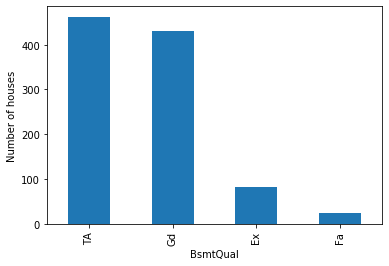

In [8]:
X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [9]:
X_train['BsmtQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'BsmtQual')

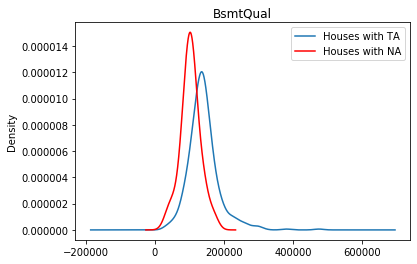

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train[X_train['BsmtQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax)

X_train[X_train['BsmtQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('BsmtQual')

In [11]:
tmp = X_train[X_train['BsmtQual']=='TA']['SalePrice']

In [12]:
X_train['BsmtQual'].fillna('TA', inplace=True)
X_test['BsmtQual'].fillna('TA', inplace=True)

/Users/mattmastin/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [13]:
X_train['BsmtQual'].isnull().sum()

0

Text(0, 0.5, 'number of houses')

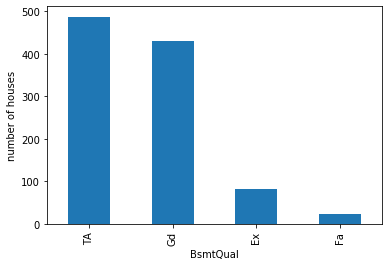

In [14]:
X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('number of houses')

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [3]:
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('/Users/mattmastin/Desktop/houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [5]:
data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.SalePrice,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [7]:
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

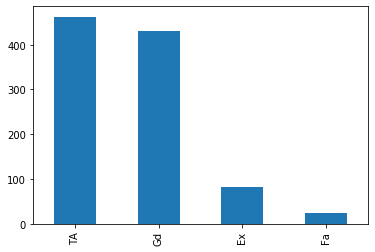

In [8]:
X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()

In [11]:
X_train['BsmtQual'].fillna('Missing', inplace=True)
X_test['BsmtQual'].fillna('Missing', inplace=True)

In [12]:
X_train.head()

,BsmtQual,FireplaceQu,SalePrice
64,Gd,NaN,219500
682,Gd,Gd,173000
960,TA,NaN,116500
1384,TA,NaN,105000
1100,TA,NaN,60000


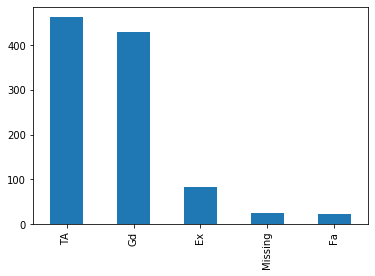

In [13]:
X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
cols_to_use = ['BsmtQual', 'FireplaceQu', 'MSZoning',
               'BsmtUnfSF', 'LotFrontage', 'MasVnrArea',
               'Street', 'Alley', 'SalePrice']

data = pd.read_csv('/Users/mattmastin/Desktop/houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 9)


,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu,SalePrice
0,RL,65.0,Pave,NaN,196.0,Gd,150,NaN,208500
1,RL,80.0,Pave,NaN,0.0,Gd,284,TA,181500
2,RL,68.0,Pave,NaN,162.0,Gd,434,TA,223500
3,RL,60.0,Pave,NaN,0.0,TA,540,Gd,140000
4,RL,84.0,Pave,NaN,350.0,Gd,490,TA,250000


In [3]:
data.isnull().mean()

MSZoning       0.000000
LotFrontage    0.177397
Street         0.000000
Alley          0.937671
MasVnrArea     0.005479
BsmtQual       0.025342
BsmtUnfSF      0.000000
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [4]:
cols_to_use.remove('SalePrice')
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                   data['SalePrice'],
                                                   test_size = 0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [6]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train[cols_to_use])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [7]:
imputer.statistics_

array(['TA', 'Gd', 'RL', 0, 60.0, 0.0, 'Pave', 'Pave'], dtype=object)

In [8]:
X_train[cols_to_use].mode()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,TA,Gd,RL,0,60.0,0.0,Pave,Pave


In [9]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([['Gd', 'Gd', 'RL', ..., 573.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ['TA', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ...,
       ['TA', 'Gd', 'RM', ..., 0.0, 'Pave', 'Pave'],
       ['Gd', 'TA', 'RL', ..., 18.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 30.0, 'Pave', 'Pave']], dtype=object)

In [10]:
pd.DataFrame(X_train, columns=cols_to_use).head()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,Gd,Gd,RL,318,60,573,Pave,Pave
1,Gd,Gd,RL,288,60,0,Pave,Pave
2,TA,Gd,RL,162,50,0,Pave,Pave
3,TA,Gd,RL,356,60,0,Pave,Pave
4,TA,Gd,RL,0,60,0,Pave,Pave


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [12]:
features_numeric = ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea', ]
features_categoric = ['BsmtQual', 'FireplaceQu', 'MSZoning',
                      'Street', 'Alley']

In [13]:
numeric_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categoric_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer(transformers=[
    ('numeric_imputer', numeric_imputer, features_numeric),
    ('categoric_imputer', categoric_imputer, features_categoric)
])

In [14]:
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('numeric_imputer',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0))],
                                          verbose=False),
                                 ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
                                ('categoric_imputer',
                                 Pipeline(m

In [15]:
preprocessor.transformers

[('numeric_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
 ('categoric_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='most_frequent',
                                 verbose=0))],
           verbose=False), ['BsmtQual',
   'FireplaceQu',
   'MSZoning',
   'Street',
   'Alley'])]

In [17]:
preprocessor.named_transformers_['numeric_imputer'].named_steps['imputer'].statistics_

array([565.99217221,  69.66866747, 103.55358899])

In [18]:
X_train[features_numeric].mean()

BsmtUnfSF      565.992172
LotFrontage     69.668667
MasVnrArea     103.553589
dtype: float64

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
np.random.seed(0)

In [26]:
data=pd.read_csv('/Users/mattmastin/Desktop/houseprice.csv')

In [27]:
features_categorical = [c for c in data.columns if data[c].dtypes=='O']
features_numerical = [c for c in data.columns if data[c].dtypes!='O' and c !='SalePrice']

In [28]:
data[features_categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [29]:
data[features_numerical].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
data.drop('SalePrice', axis=1),
data['SalePrice'],
test_size=0.3,
random_state=0)

X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [33]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
transformers=[
    ('numerical', numeric_transformer, features_numerical),
    ('categorical', categorical_transformer, features_categorical)
])

In [34]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', Lasso(max_iter=2000))])

In [35]:
param_grid = {
    'preprocessor__numerical__imputer__strategy': ['mean', 'median'],
    'preprocessor__categorical__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__alpha': [10, 100, 200]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, iid=False, n_jobs=-1, scoring='r2')

In [38]:
grid_search.fit(X_train, y_train)

print(f'best linear search regression from grid search {grid_search.score(X_train, y_train)}')

/Users/mattmastin/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/model_selection/_search.py:821: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


best linear search regression from grid search 0.9333575485587883


In [39]:
grid_search.best_params_

{'classifier__alpha': 100,
 'preprocessor__categorical__imputer__strategy': 'constant',
 'preprocessor__numerical__imputer__strategy': 'median'}

In [42]:
grid_search.cv_results_['params']

[{'classifier__alpha': 10,
  'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'mean'},
 {'classifier__alpha': 10,
  'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'median'},
 {'classifier__alpha': 10,
  'preprocessor__categorical__imputer__strategy': 'constant',
  'preprocessor__numerical__imputer__strategy': 'mean'},
 {'classifier__alpha': 10,
  'preprocessor__categorical__imputer__strategy': 'constant',
  'preprocessor__numerical__imputer__strategy': 'median'},
 {'classifier__alpha': 100,
  'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'mean'},
 {'classifier__alpha': 100,
  'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'median'},
 {'classifier__alpha': 100,
  'preprocessor__categorical__imputer__strategy': 'constant',
  'pre

In [43]:
grid_search.cv_results_['mean_test_score']

array([0.84746254, 0.84739594, 0.84814964, 0.8481309 , 0.86624908,
       0.86621021, 0.86646886, 0.86651035, 0.86552764, 0.8654755 ,
       0.86525292, 0.86523714])

In [44]:
grid_search.score(X_test, y_test)

0.7379670441295108